In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
from qoop.core.ansatz import chain_zxz_pennylane
import constant
%load_ext autoreload
%autoreload 2

In [16]:
import glob
import pennylane as qml
from qoop.core import optimizer_pennylane
import os
optimizer_funcs = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]
step_sizes = np.linspace(0.01, 0.1, 19)
for optimizer_func in optimizer_funcs:
    optimizer = optimizer_func.__name__
    for stepsize in step_sizes:
        begin_filename = f'lossvqe_3qubit_2layer_{optimizer}_stepsize{np.round(stepsize, 3)}'
        files = glob.glob(f"../data/loss/{begin_filename}*.txt")
        if len(files) > 0:
            # print(files[0])
            print(begin_filename)
            os.rename(files[0], f"../data/loss/{begin_filename}.txt")

lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.01
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.015
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.02
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.025
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.03
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.035
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.04
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.045
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.05
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.055
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.06
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.065
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.07
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.075
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.08
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.09
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.095
lossvqe_3qubit_2layer_AdamOptimizer_stepsize0.1
lossvqe_3qubit_2layer_AdamWOptimizer_stepsize0.01
lossvqe_3qubit_2layer_AdamWOptimizer_stepsize0.02
lossvqe_3qu

<Figure size 2000x1000 with 0 Axes>

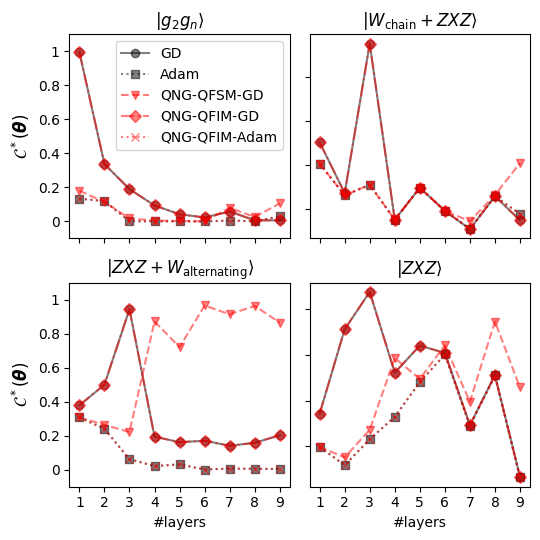

In [51]:
# Create a figure object
fig = plt.figure(figsize=(20, 10))

# Create 4x2 subplots
labels = ['GD', 'Adam', 'QNG-QFSM-GD', 'QNG-QFIM-GD', 'QNG-QFIM-Adam']
line_styles = ['solid', 'dotted', 'dashed', 'dashdot', 'dotted']
colors = ['black', 'black', 'red', 'red', 'red']
markers = ['o', 's', 'v', 'D', 'x']
problems = [
    'VQE',
    'QAOA',
    'Dynamic simulation'
]
t = 0
fig, ax = plt.subplots(1, 3, figsize=(4, 8))
for k, problem in enumerate(problems):
    # --------- Begin: Draw cost and time for various layer numbers ---------
    num_layers = list(range(1, 10)) 
    num_qubit = 5
    for j, optimizer in enumerate(constant.optimizers_name):
        losss = []
        for i, num_layer in enumerate(num_layers):
            # Load data
            loss = np.loadtxt(f"../data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
            losss.append(loss[j][-1])
        ax[k //2, k %2].plot(list(range(1, 10)), losss, alpha = 0.5, marker = markers[j], label = labels[j], linestyle = line_styles[j], color = colors[j])
    ax[k //2, k %2].set_title(title[k], fontsize = 12)
    if k in [0, 2]:
        ax[k //2, k %2].set_ylim(-0.1, 1.1)
        ax[k //2, k %2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax[k //2, k %2].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax[k //2, k %2].set_ylabel(r"$\mathcal{C}^* (\boldsymbol{\theta})$", fontsize = 12)
    else:
        ax[k //2, k %2].set_yticklabels([])
    ax[k //2, k %2].set_xticks(list(range(1, 10)))
    if k in [2, 3]:
        ax[k //2, k %2].set_xlabel("#layers")
    else:
        ax[k //2, k %2].set_xticklabels([])
    k += 1
ax[0, 0].legend(ncol = 1)
# plt.legend(ncol = 5)
#plt.tight_layout()
plt.tight_layout()
plt.savefig('../data/images/new_mincost_vs_ansatz.svg', bbox_inches='tight')
plt.show()